In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [3]:
#carga el dataset de ropa que sellama fashin_mnist
fashion_mnist = keras.datasets.fashion_mnist

#se cargan las imagenes en el training y test sets con sus labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
#se crea este array para guardar los nombres de los tags que están en los labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#para ver la forma que tiene el training set, son 60 mil imaenes de 28x28
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
#cantidad de imagenes en el test set
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

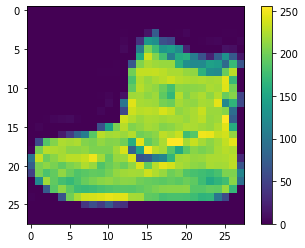

In [9]:
#hay que pre-procesar la data, si vemos una imagen, podemos ver que los pixels van de 0 a 256
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#hay que normalizar los pixels de 0 a 1, entonces dividimos todo por 255
train_images = train_images / 255.0
test_images = test_images / 255.0

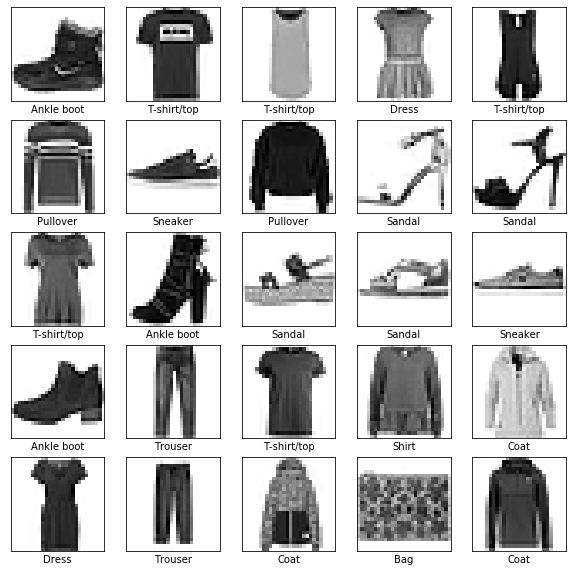

In [11]:
#vamos a ver como quedaron las imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
#creamos un modelo, que tiene 28x28 inputs, una capa interna de 128 neuronas y 10 outputs
#flatten transforma de un array multidimensional a 1 dimension

#las capas Dense, significal fully connected layers. Una tiene una función de activación relu y la otra softmax
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
#ahora vamos a compilar el modelo
#lo que se hace es unsar un optimizador, que es el algoritmo por el cual se entrena, una función de perdida
#que es la que indica cuan suave es el algotirmo de entrenamiento y finalmente la metric es como se va a mostrar
#el resultado
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#para entrenar se llama así al modelo:
model.fit(train_images, train_labels, epochs=10)
#significa que use el primer parametro como input, el segundo como output y el tercero son las vueltas


Epoch 1/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4970 - acc: 0.8236
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3741 - acc: 0.8649
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3360 - acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3103 - acc: 0.8866
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2922 - acc: 0.8908
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2791 - acc: 0.8961
Epoch 7/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2658 - acc: 0.9008
Epoch 8/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2559 - acc: 0.9042
Epoch 9/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2449 - acc: 0.9090
Epoch 10/10
60000/60000 [==============================] - 2s 36us/sample - loss: 

In [15]:
#ya entrenado el modelo, se puede comparar contra el test set
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3397 - acc: 0.8826

Test accuracy: 0.8826


In [16]:
#una ves entrenado el modelo, puedo usarlo para hacer predicciones
predictions = model.predict(test_images)
#de esta forma se predijeron todas juntas

In [17]:
#para verlas se puede ver el primer elemento del array
predictions[0]

array([1.2958445e-07, 1.3176721e-10, 1.0270143e-07, 1.4164634e-09,
       1.6241568e-09, 1.1638259e-03, 3.2147441e-06, 1.7509710e-02,
       1.2387555e-07, 9.8132288e-01], dtype=float32)

In [18]:
#se nota que el último es el maximo, pero se puede ver mas facil así
np.argmax(predictions[0])

9

In [19]:
#el cual es 
test_labels[0]

9

In [20]:
#con todo este código, se pueden grafica las predicciones
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

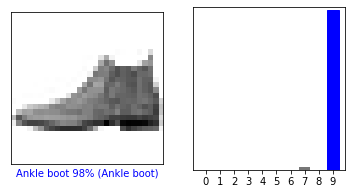

In [21]:
#se llaman ahora las funcions para graficas
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

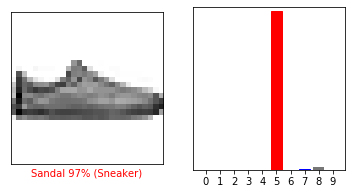

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

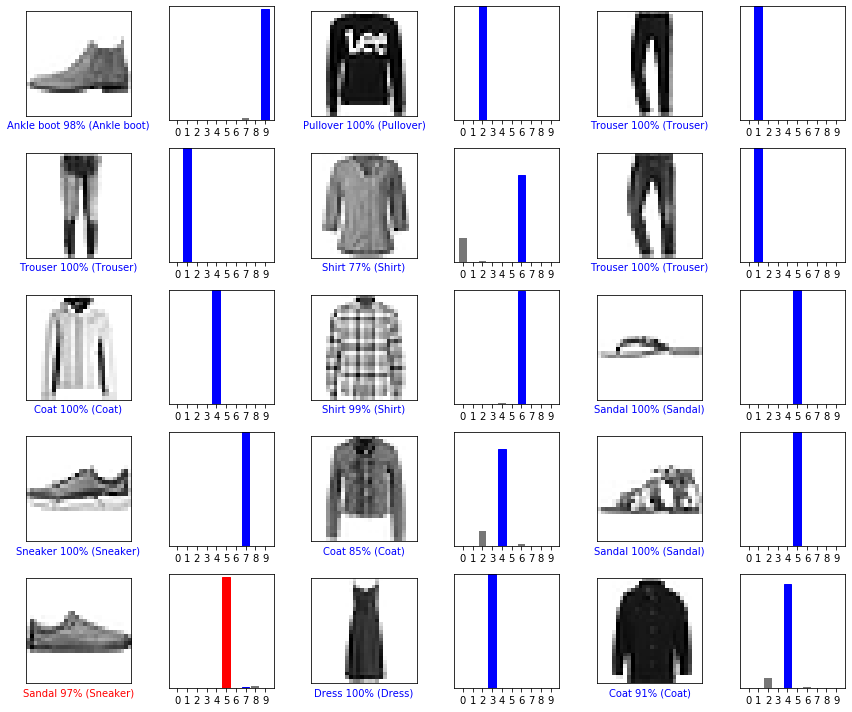

In [23]:
#se pueden predecir varias al mismo tiempo asi
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [24]:
#para predecir una sola imagen se puede hacer así
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [25]:
#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
#Accordingly, even though you're using a single image, you need to add it to a list:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


[[1.34502425e-05 5.40336214e-17 9.99587357e-01 6.45846779e-11
  2.46352982e-04 1.10103198e-15 1.52925539e-04 3.70014884e-20
  1.00299647e-11 2.87771900e-16]]


2

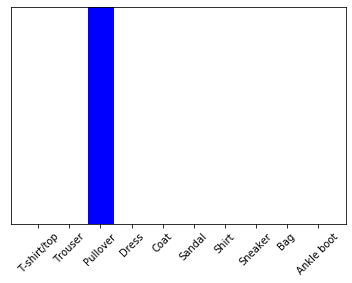

In [28]:
#ahora se predice
predictions_single = model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])